# PID Parameter Tuning Using Neural


![PID_Neural](PID_Neural.png)
Proses penalaan nilai Kc, τI dan τD pada
pengendali PID menggunakan JST

In [1]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting

import sys # For printing

### Neural Network Implementation


### Training Data

Suppose the error and delta_error are ideal for generating PID gain Kc, tauI and tauD, as follows:

In [2]:
# The training data.
X = np.array([
    [5, 1],
    [4, 1.2],
    [1, 1],
    [1, 0.1]
])

# The labels for the training data.
y = np.array([
    [0.1, 4.0, 0],
    [0.2, 4.1, 0.1],
    [0.1, 4.0, 0],
    [0.1, 4.0, 0]
])

### Neural Network Structure
These are just additional parameters which are required by the weights for their dimensions.

In [3]:
num_i_units = 2 # Number of Input units
num_h_units = 3 # Number of Hidden units
num_o_units = 3 # Number of Output units

### Neural Network Parameters
These are the parameters required directly by the NN. Comments should describe the variables.

In [4]:
# The learning rate for Gradient Descent.
learning_rate = 0.01

# The parameter to help with overfitting.
reg_param = 0

# Maximum iterations for Gradient Descent.
max_iter = 100

# Number of training examples
m = 4

### Generating the Weights and Biases

The weights here are going to be generated using a [Normal Distribution(Gaussian Distribution)](http://mathworld.wolfram.com/NormalDistribution.html). They will also be seeded so that the outcome always comes out the same.

In [5]:
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 3x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 3x3

B1 = np.random.random((num_h_units, 1)) # 3x1
B2 = np.random.random((num_o_units, 1)) # 3x1

In [6]:
W1

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]])

In [7]:
W2

array([[ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944]])

In [8]:
B1

array([[0.87638915],
       [0.89460666],
       [0.08504421]])

In [9]:
B2

array([[0.03905478],
       [0.16983042],
       [0.8781425 ]])

### Sigmoid Function
[This](http://mathworld.wolfram.com/SigmoidFunction.html) function maps any input to a value between 0 and 1.

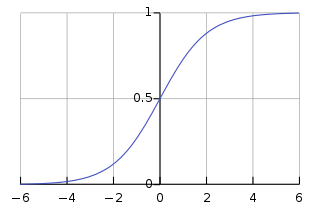

In my implementation, I have added a boolean which if set to true, will return [Sigmoid Prime(the derivative of the sigmoid function)](http://www.ai.mit.edu/courses/6.892/lecture8-html/sld015.htm) of the input value. This will be used in backpropagation later on.

In [10]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

### Forward Propagation
[This](https://en.wikipedia.org/wiki/Feedforward_neural_network) is how predictions are made. Propagating the input through the NN to get the output.

In my implementation, the forward function only accepts a feature vector as row vector which is then converted to a column vector. Also, the predict boolean, if set to true, only returns the output. Otherwise, it returns a tuple of the outputs of all the layers.

In [11]:
def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2=  W1.dot(a1) + B1 # 3x3 * 3x1 + 3x1 = 3x1
    a2 = sigmoid(z2) # 3x1

    z3 = W2.dot(a2) + B2 # 3x3 * 3x1 + 3x1 = 3x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

### Gradients for the Weights and Biases
These variables will contain the gradients for the weights and biases which will be used by gradient descent to update the weights and biases.

Also, creating the vector which will be storing the cost values for each gradient descent iteration to help visualize the cost as the weights and biases are updated.

In [12]:
dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after each Gradient Descent iteration.

## Training
This is the training function which contains the meat of NN. This contains forward propagation and [Backpropagation](http://neuralnetworksanddeeplearning.com/chap2.html).

### Backpropagation
The process of propagating the error in the output layer, backwards through the NN to calculate the error in each layer. Intuition: It's like forward propagation, but backwards.

Steps(for this NN):
1. Calculate the error in the output layer(dz2).
2. Calculate the error in the weights connecting the hidden layer to the output layer using dz2 (dW2).
3. Calculate the error in the hidden layer(dz1).
4. Calculate the error in the weights connecting the input layer to the hidden layer using dz1 (dW1).
5. The errors in the biases are just the errors in the respective layers.

Afterwards, the gradients(errors) of the weights and biases are used to update the corresponding weights and biases by multiplying them with the negative of the learning rate and scaling it by divinding it by the number of training examples.

While iterating over all the training examples, the cost is also being calculated simultaneously for each example. Then, a regurlization parameter is added, although for such a small dataset, regularization is unnecessary since to perform well, the NN will have to over fit to the training data.

In [13]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 3x2 * 2x1 + 3x1 = 3x1
            a1 = sigmoid(z1) # 3x1

            z2 = _W2.dot(a1) + _B2 # 3x2 * 2x1 + 3x1 = 3x1
            a2 = sigmoid(z2) # 3x1

            # Back prop.
            dz2 = a2 - y[j].reshape(y[j].shape[0], 1) # 3x1
            dW2 += dz2 * a1.T # 3x1 .* 1x3 = 3x3

            dz1 = np.multiply((_W2.T).dot(dz2), sigmoid(a1, derv=True)) # (3x3 * 3x1) .* 3x1 = 3x1
            dW1 += dz1.dot(a0.T) # 3x1 * 1x2 = 3x2 

            dB1 += dz1 # 3x1
            dB2 += dz2 # 3x1

            c = c + (-(y[j].reshape(y[j].shape[0], 1) * np.log(a2)) - ((1 - y[j].reshape(y[j].shape[0], 1)) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        
    return (_W1, _W2, _B1, _B2)

## Running
Now, let's try out the NN. Here, I have called the train() function. You can make any changes you like and then run all the kernels again. I have also plotted the cost function to visual how the NN performed.

The console printing might be off.

The weights and biases are then shown.

In [14]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

Iteration: 100 and 4

In [15]:
W1

array([[ 1.76215436, -0.52459891],
       [ 1.01142515, -0.48005687],
       [-0.38896508, -2.62246737]])

In [16]:
W2

array([[ 1.28957911, -1.11314828,  0.23166637],
       [ 2.71574388,  3.87669332, -1.56702173],
       [-0.7302115 , -0.69582203,  1.04798178]])

In [17]:
B1

array([[ 1.01143722],
       [ 1.68156608],
       [-0.51491534]])

In [18]:
B2

array([[-0.44116596],
       [ 3.28760509],
       [ 0.44656029]])

### Plotting
Now, let's plot a simple plot showing the cost function with respect to the number of iterations of gradient descent.

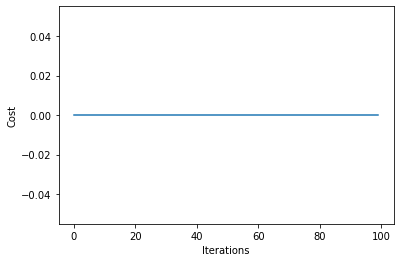

In [19]:
# Assigning the axes to the different elements.
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# Observation
With the initial parameters, the cost function doesn't look that good. It is decreasing which is a good sign but it isn't flattening out. I have tried, multiple different values but this some seems like the best fit.

Try out your own values, run the notebook again and see what you get.

In [20]:
coba = np.array([
    [5, 1]
])

In [21]:
coba

array([[5, 1]])

In [22]:
    # Forward Prop.
    for j in range(1):
            a0 = coba[j].reshape(coba[j].shape[0], 1) # 2x1

            z1 = W1.dot(a0) + B1 # 3x2 * 2x1 + 3x1 = 3x1
            a1 = sigmoid(z1) # 3x1

            z2 = W2.dot(a1) + B2 # 3x2 * 2x1 + 3x1 = 3x1
            outNN = sigmoid(z2) # 3x1

In [23]:
outNN

array([[0.43504464],
       [0.99994792],
       [0.27455905]])

In [24]:
result_Kc   = outNN[0]
result_tauI = outNN[1]
result_tauD = outNN[2]

In [25]:
result_Kc

array([0.43504464])

In [26]:
result_tauI

array([0.99994792])

In [27]:
result_tauD

array([0.27455905])

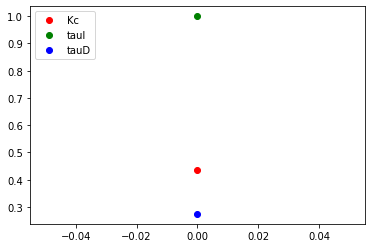

In [28]:
# Visualize 
plt.plot(result_Kc, 'ro', label='Kc')
plt.plot(result_tauI, 'go', label='tauI')
plt.plot(result_tauD, 'bo', label='tauD')

#plt.xlabel('Kc, tauI, tauD');
#plt.legend((result_Kc, result_tauI, result_tauD), ('Kc', 'tauI', 'tauD'))

plt.legend(loc='upper left')
#pylab.ylim(-1.5, 2.0)
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display

interactive(children=(FloatSlider(value=0.43504464166530055, description='Kc', max=1.0, min=-0.2, step=0.05), …

<function __main__.pidPlot(Kc, tauI, tauD)>

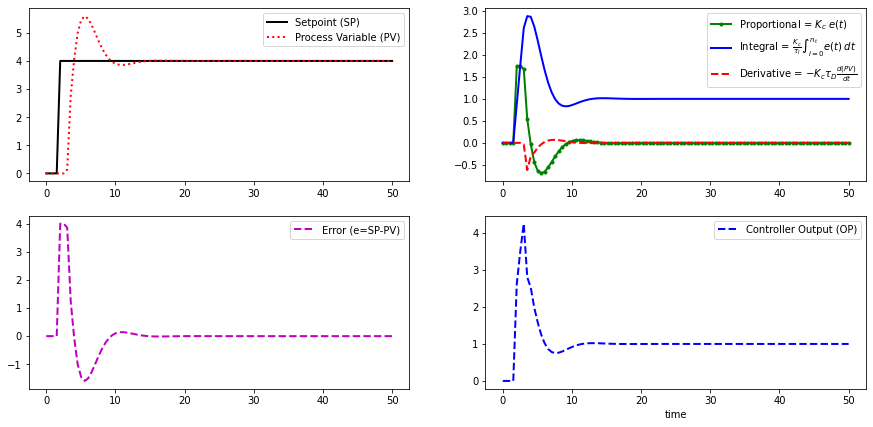

In [30]:
n = 100 # time points to plot
tf = 50.0 # final time
SP_start = 2.0 # time of set point change

def process(y,t,u):
    Kp = 4.0
    taup = 3.0
    thetap = 1.0
    if t<(thetap+SP_start):
        dydt = 0.0  # time delay
    else:
        dydt = (1.0/taup) * (-y + Kp * u)
    return dydt

def pidPlot(Kc,tauI,tauD):
    t = np.linspace(0,tf,n) # create time vector
    P= np.zeros(n)          # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    D = np.zeros(n)         # initialize derivative term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.zeros(n)        # initialize process variable
    SP = np.zeros(n)        # initialize setpoint
    SP_step = int(SP_start/(tf/(n-1))+1) # setpoint start
    SP[0:SP_step] = 0.0     # define setpoint
    SP[SP_step:n] = 4.0     # step up
    y0 = 0.0                # initial condition
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[i-1],))  # compute next step
        y0 = y[1]                  # record new initial condition
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
        
    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Process Variable (PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = $\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = $-K_c \tau_D \frac{d(PV)}{dt}$')    
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Controller Output (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')
    
Kc_slide = wg.FloatSlider(value=result_Kc,min=-0.2,max=1.0,step=0.05)
tauI_slide = wg.FloatSlider(value=result_tauI,min=0.01,max=5.0,step=0.1)
tauD_slide = wg.FloatSlider(value=result_tauD,min=0.0,max=1.0,step=0.1)
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)